In [2]:
!pip install xgboost
!pip install lightgbm


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import os
import sys
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
from IPython.display import display
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
#from lightgbm import LGBMRegressor
#from lightgbm import LGBMClassifier
#from catboost import CatBoostRegressor
#from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from itertools import groupby
import gc
from time import time


In [4]:
series = "./Data/train_series.parquet"
events = "./Data/train_events.csv"
train_series = pd.read_parquet(series)
train_events = pd.read_csv(events)

In [5]:
#series_id unique et nombre réel
series_id = train_events['series_id'].unique()
print("Nombre de séries : ", len(series_id))
train_series_id = train_series['series_id'].unique()
print("Nombre de séries dans train: ", len(train_series_id))
#Nombre de lignes dans train
print("Nombre de lignes dans train : ", train_series.shape[0])
#Nombre de lignes dans events
print("Nombre de lignes dans events : ", train_events.shape[0])

Nombre de séries :  277
Nombre de séries dans train:  277
Nombre de lignes dans train :  127946340
Nombre de lignes dans events :  14508


In [6]:
train2 = pd.read_parquet("./Data/Zzzs_train_multi.parquet")
print("Nombre de séries dans train2 : ", len(train2['series_id'].unique()))

Nombre de séries dans train2 :  43


In [7]:
#Nom des colonnes train2
print("Colonnes de train2 : ", train2.columns)
print("head de train2 : ", train2.head(10))

Colonnes de train2 :  Index(['series_id', 'step', 'timestamp', 'anglez', 'enmo', 'awake'], dtype='object')
head de train2 :        series_id  step                 timestamp     anglez    enmo  awake
0  08db4255286f     0  2018-11-05T10:00:00-0400 -30.845301  0.0447      1
1  08db4255286f     1  2018-11-05T10:00:05-0400 -34.181801  0.0443      1
2  08db4255286f     2  2018-11-05T10:00:10-0400 -33.877102  0.0483      1
3  08db4255286f     3  2018-11-05T10:00:15-0400 -34.282101  0.0680      1
4  08db4255286f     4  2018-11-05T10:00:20-0400 -34.385799  0.0768      1
5  08db4255286f     5  2018-11-05T10:00:25-0400 -34.925598  0.0511      1
6  08db4255286f     6  2018-11-05T10:00:30-0400 -30.513399  0.1073      1
7  08db4255286f     7  2018-11-05T10:00:35-0400 -30.509399  0.0649      1
8  08db4255286f     8  2018-11-05T10:00:40-0400 -32.880600  0.0485      1
9  08db4255286f     9  2018-11-05T10:00:45-0400 -34.674999  0.0462      1


In [8]:
#Head de train_series
print("Head de train_series : ", train_series.head(10))
#Head de train_events
print("Head de train_events : ", train_events.head(10))

Head de train_series :        series_id  step                 timestamp  anglez    enmo
0  038441c925bb     0  2018-08-14T15:30:00-0400  2.6367  0.0217
1  038441c925bb     1  2018-08-14T15:30:05-0400  2.6368  0.0215
2  038441c925bb     2  2018-08-14T15:30:10-0400  2.6370  0.0216
3  038441c925bb     3  2018-08-14T15:30:15-0400  2.6368  0.0213
4  038441c925bb     4  2018-08-14T15:30:20-0400  2.6368  0.0215
5  038441c925bb     5  2018-08-14T15:30:25-0400  2.6367  0.0217
6  038441c925bb     6  2018-08-14T15:30:30-0400  2.6367  0.0217
7  038441c925bb     7  2018-08-14T15:30:35-0400  2.6367  0.0218
8  038441c925bb     8  2018-08-14T15:30:40-0400  2.7980  0.0223
9  038441c925bb     9  2018-08-14T15:30:45-0400  3.0847  0.0217
Head de train_events :        series_id  night   event     step                 timestamp
0  038441c925bb      1   onset   4992.0  2018-08-14T22:26:00-0400
1  038441c925bb      1  wakeup  10932.0  2018-08-15T06:41:00-0400
2  038441c925bb      2   onset  20244.0  2018-08-1

Nombre de séries dans train_series :  43
Trois premières séries :  ['08db4255286f' '0a96f4993bd7' '0cfc06c129cc']


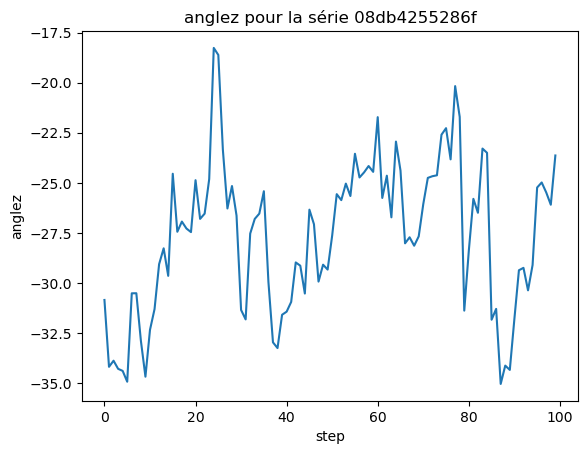

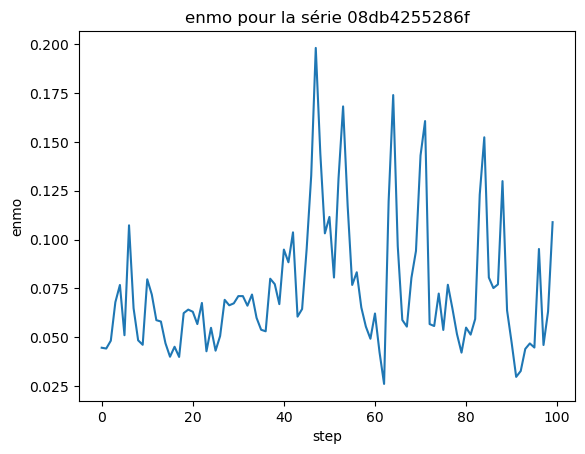

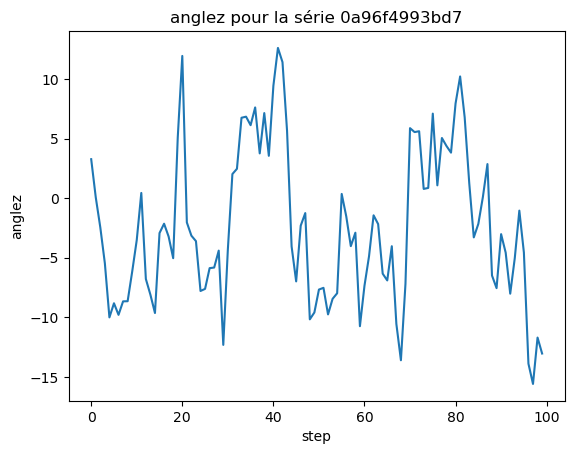

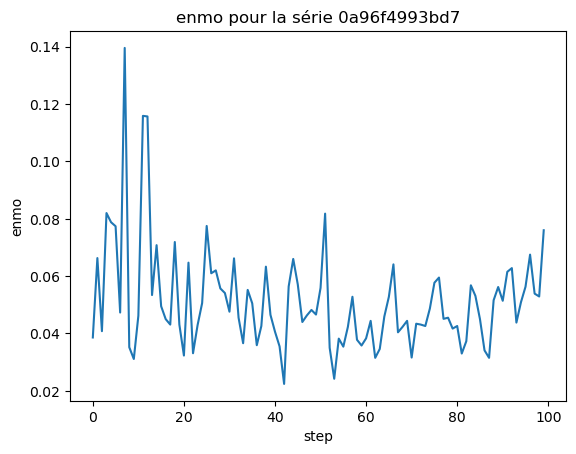

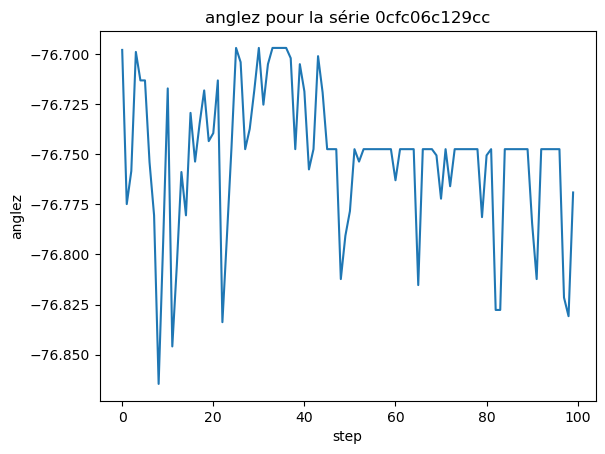

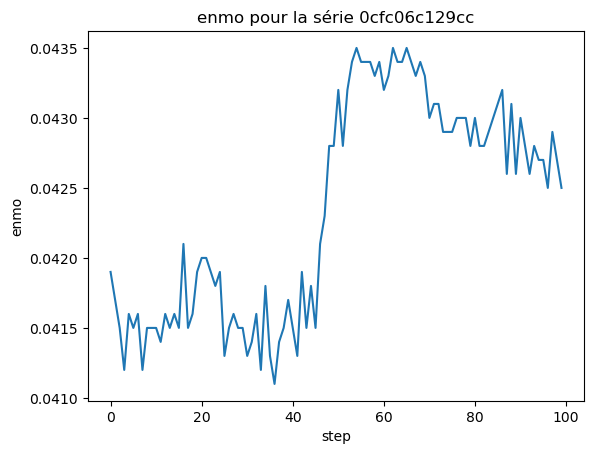

In [13]:
#tracer anglez et enmo pour trois premières séries
id_series = train2['series_id'].unique()
print("Nombre de séries dans train_series : ", len(id_series))
premieres_series = id_series[:3]
print("Trois premières séries : ", premieres_series)
for i in premieres_series:
    anglez = train2[train2['series_id'] == i]['anglez'][:100]
    enmo = train2[train2['series_id'] == i]['enmo'][:100]
    step = np.arange(0, 100, 1)
    #2figures pour chaque série
    plt.figure()
    plt.plot(step, anglez)
    plt.xlabel('step')
    plt.ylabel('anglez')
    plt.title('anglez pour la série ' + str(i))
    plt.figure()
    plt.plot(step, enmo)
    plt.xlabel('step')
    plt.ylabel('enmo')
    plt.title('enmo pour la série ' + str(i))
    plt.show()